In [1]:
import pandas as pd
import numpy as np
import re
import tqdm as tqdm
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer



import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jainr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jainr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jainr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jainr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_excel("A1_dataset.xlsx")

In [4]:
data.head()

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...


PRE PROCESSING OF DATA

In [5]:
punctuations = string.punctuation
def remove_punct(sent):
    x="".join([letter for letter in sent if letter not in punctuations])
    return(x)

In [6]:
def remove_white_spaces(sent):
    x = re.sub(r'\s+',' ',sent)#will remove extra spaces
    return(x)

In [7]:
def tokenization(sent):
    tokens = word_tokenize(sent)
    return tokens

In [8]:
def remove_stop_words(tokens):
    good_words = []
    for word in tokens:
        match = re.match('(?!no)\w{1,2}\\b',word+' ')
        x = bool(match)
        if x is not True :
            good_words.append(word)
    row = ' '.join(good_words)
    return row

In [9]:
def remove_url_html(sent):
    pat = re.compile("@[a-zA-Z0-9_]+")#atleast one character should be present after @ and valid username contains alphabets,digits and _
    cl_pat = re.sub(pat, ' ', sent)
    pat = re.compile("www.\S+")
    cl_pat = re.sub(pat, ' ', cl_pat)
    pat = re.compile("<.*?>")#html
    cl_pat = re.sub(pat, ' ', cl_pat)
    pat = re.compile("https?://\S+")#url
    cl_pat = re.sub(pat, ' ', cl_pat)
    return str(cl_pat)

In [10]:
def spelling_correction(sent):
    corr = TextBlob(sent)
    sent_corr = corr.correct()
    return str(sent_corr)


In [11]:
def lemmatizing(row):
    lemmatizer = WordNetLemmatizer()
    lemm_words=[]
    for word in row.split(" "):

        lemm_words.append(lemmatizer.lemmatize(word))

    lemmed = ' '.join(lemm_words)
    return lemmed

In [12]:
def preprocessing_pipeline(row):
    row = remove_url_html(row)
    row = remove_punct(row)
    row = remove_white_spaces(row)
    words = tokenization(row)
    row = remove_stop_words(words)
    row = spelling_correction(row)
    row = lemmatizing(row)
    return row

In [13]:
def text_preprocessing_on_one_sentence(sentence):
    sentence = remove_url_html(sentence)
    print("after url-html removal :",sentence)
    sentence = remove_punct(sentence)
    print("after punctuation removal :",sentence)
    sentence = remove_white_spaces(sentence)
    print("after white space removal :",sentence)
    words = tokenization(sentence)
    print("after tokenization :",words)
    sentence = remove_stop_words(words)
    print("after stop words removal :",sentence)
    sentence = spelling_correction(sentence)
    print("after spelling  correction :",sentence)
    sentence = lemmatizing(sentence)
    print("after lemmatizing :",sentence)

In [14]:
print(data.loc[322]) #sentence belonging to class 1

LABEL                                                        1
DATE_TIME                             Mon Jun 15 21:23:06 2009
TEXT         Watch them cause it'll make me smile  http://b...
Name: 322, dtype: object


In [15]:
sentence = data.loc[322,'TEXT']
print("Before preprocessing \n",sentence)
text_preprocessing_on_one_sentence(sentence)

Before preprocessing 
 Watch them cause it'll make me smile  http://bit.ly/nZZQV /// http://bit.ly/etD3a /// Comment - Rate - Subscribe - Fav!
after url-html removal : Watch them cause it'll make me smile    ///   /// Comment - Rate - Subscribe - Fav!
after punctuation removal : Watch them cause itll make me smile        Comment  Rate  Subscribe  Fav
after white space removal : Watch them cause itll make me smile Comment Rate Subscribe Fav
after tokenization : ['Watch', 'them', 'cause', 'itll', 'make', 'me', 'smile', 'Comment', 'Rate', 'Subscribe', 'Fav']
after stop words removal : Watch them cause itll make smile Comment Rate Subscribe Fav
after spelling  correction : Watch them cause till make smile Comment Late Subscribe A
after lemmatizing : Watch them cause till make smile Comment Late Subscribe A


In [16]:
print(data.loc[865]) #sentence belonging to class 0

LABEL                                                        0
DATE_TIME                             Mon Jun 15 16:30:52 2009
TEXT         @Mamasaywhat bitch!!  Lol...j/k...mines almost...
Name: 865, dtype: object


In [17]:
sentence = data.loc[865,'TEXT']
print("Before preprocessing \n",sentence)
text_preprocessing_on_one_sentence(sentence)

Before preprocessing 
 @Mamasaywhat bitch!!  Lol...j/k...mines almost done too...then 1 1/2 - 2 hour work out
after url-html removal :   bitch!!  Lol...j/k...mines almost done too...then 1 1/2 - 2 hour work out
after punctuation removal :   bitch  Loljkmines almost done toothen 1 12  2 hour work out
after white space removal :  bitch Loljkmines almost done toothen 1 12 2 hour work out
after tokenization : ['bitch', 'Loljkmines', 'almost', 'done', 'toothen', '1', '12', '2', 'hour', 'work', 'out']
after stop words removal : bitch Loljkmines almost done toothen hour work out
after spelling  correction : bitch Loljkmines almost done toothed hour work out
after lemmatizing : bitch Loljkmines almost done toothed hour work out


In [18]:
for i in tqdm.tqdm(data.index):
    data.loc[i,'TEXT'] = preprocessing_pipeline(data.loc[i,'TEXT'])

100%|██████████| 4287/4287 [12:50<00:00,  5.56it/s]  


In [19]:
data.head()

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About get treated and scared
1,1,Thu May 14 10:13:55 2009,like Shezan Mangooo too had one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked car after work showering then going bed...
3,1,Sun Jun 14 22:25:52 2009,Actually start this afternoon will try have so...
4,1,Sun May 31 00:42:12 2009,Www Dont worrywell vote for you nonstop co lov...


In [20]:
text_pos = " ".join(data.loc[i,'TEXT'] for i in data.index if data.loc[i,'LABEL']==1)
text_neg = " ".join(data.loc[i,'TEXT'] for i in data.index if data.loc[i,'LABEL']==0)

In [21]:
word_cloud = WordCloud().generate(text_pos)

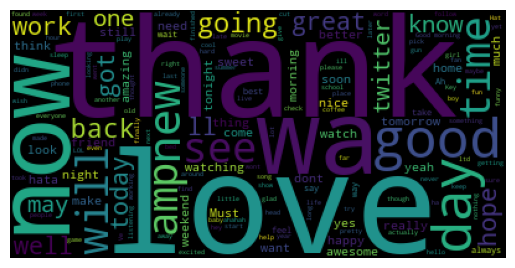

In [22]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

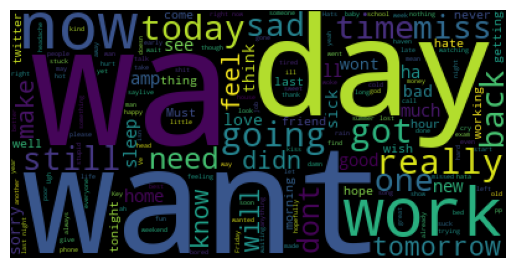

In [23]:
word_cloud = WordCloud().generate(text_neg)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [24]:

Max_features = 2000000 #maximum words in vocab

In [25]:
vectorizer = TextVectorization(max_tokens=Max_features,
                               output_sequence_length=350,
                               output_mode='int')

In [26]:
vectorizer.adapt(data['TEXT'].values)

In [27]:
vectorized_text = vectorizer(data['TEXT'].values)

In [28]:
vectorized_text

<tf.Tensor: shape=(4287, 350), dtype=int64, numpy=
array([[  49,   18, 1842, ...,    0,    0,    0],
       [  25, 3498, 4476, ...,    0,    0,    0],
       [ 724,  375,  118, ...,    0,    0,    0],
       ...,
       [  65, 3664,   33, ...,    0,    0,    0],
       [ 848,   77,  710, ...,    0,    0,    0],
       [  65,  278,  100, ...,    0,    0,    0]], dtype=int64)>

In [29]:
labels= data['LABEL'].values
labels

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [30]:
tf.random.set_seed(42)

model11=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model11.compile(loss="binary_crossentropy",
               optimizer='Adam',
               metrics=["accuracy"])


#create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history11=model11.fit(vectorized_text,labels,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4649 - loss: 119.9274 - learning_rate: 1.0000e-04
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4644 - loss: 46.3564 - learning_rate: 1.1220e-04
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4724 - loss: 20.2789 - learning_rate: 1.2589e-04
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4963 - loss: 7.5723 - learning_rate: 1.4125e-04
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 3.9218 - learning_rate: 1.5849e-04
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5156 - loss: 2.5250 - learning_rate: 1.7783e-04
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5328 - loss: 1.8657 - learning_rate: 1.9953e-04
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5356 - loss: 1.4666 - learning_rate: 2.2387e-04
Epoch 9/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5344 - lo

In [31]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, labels))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(64)
dataset = dataset.prefetch(64)

In [32]:
train = dataset.take(int(len(dataset)*.7))
test = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.3))

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding,Input

In [34]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(Max_features+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam',metrics=["accuracy"])

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train, epochs=20, validation_data=test)


In [ ]:
plt.figure(figsize=(15,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
results = model.evaluate(test)

In [ ]:
model = tf.keras.models.load_model('analysis.h5')

In [ ]:
input='I am not unhappy person'

In [ ]:
print("Before preprocessing \n",input)
text_preprocessing_on_one_sentence(input)

In [ ]:
res=model.predict(vectorized_text)
k=res.round()

In [ ]:
classes_name=['Negative Comment',' Positive Comment']

In [ ]:
classes_name[int(k[0][0])]

In [ ]:
import gradio as gr
from transformers import pipeline

# Load sentiment analysis model
sentiment_analysis = pipeline("sentiment-analysis")

def analyze_sentiment(text):
    result = sentiment_analysis(text)[0]
    label = result['label']

    return f'Sentiment: {label}'

# Create Gradio interface
iface = gr.Interface(fn=analyze_sentiment, inputs="text", outputs="text", title="Sentiment Analysis")
iface.launch()